In [3]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [46]:
spikes=np.load('spikes.npy')
cell_identity=np.load('cell_identity.npy')[spikes>0]
spikes=spikes[spikes>0]

-1.05
Running time of simulation:  114.02166271209717


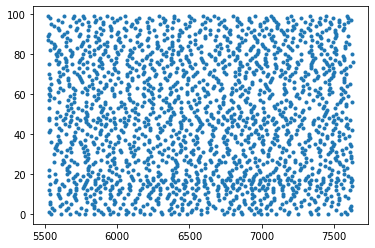

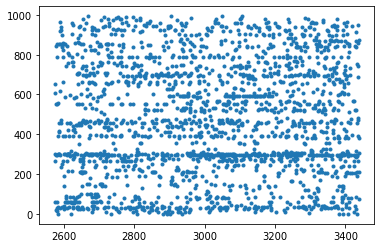

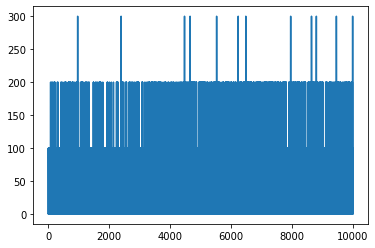

In [47]:
def plot_rasters(Mgp,Minput,pop):
    '''
    Plot 2000 time points from the middle of the simulation.
    '''
    plot(Mgp.t[4000:6000]/ms, Mgp.i[4000:6000], '.')
    plt.show()
    plot(Minput.t[4000:6000]/ms,Minput.i[4000:6000],'.')
    plt.show()
    plot(pop.t/ms, pop.rate/Hz)
    plt.show()
    
seed(7)
    
start=time.time()
#Clocks
simulation_clock=Clock(dt = 0.01*ms)
defaultclock.dt = 0.01*ms
#Parameters
t_ampa=2*ms
Cm= 0.5*nF
E_ampa=0.0*mV
g_ext_ampa=3.1*nS
vr = -70*mV
vt = -60*mV
taupre = 20*ms
taupost = taupre
gmax = 1.0
dApre = 1.0
dApost = -dApre * taupre / taupost * 1.05
print(dApost)
dApost *= gmax
dApre *= gmax
#Equations
eqs ='''
dv/dt = I_ampa/Cm : volt
I_ampa=-g_ext_ampa*s_ext*(v-E_ampa) : amp
ds_ext/dt=-s_ext/t_ampa : 1
'''
#NeuronGroups
neuron = NeuronGroup(100, eqs, threshold='v>vt', reset='v=vr')
neuron.v = E_ampa
neuron.s_ext = 0
spikes_gen=SpikeGeneratorGroup(1000,list(cell_identity),spikes*ms)
#Synapses
w = 1
S = Synapses(spikes_gen, neuron, '''w : 1
                dApre/dt = -Apre / taupre : 1 (event-driven)
                dApost/dt = -Apost / taupost : 1 (event-driven)''',
                on_pre='''s_ext += w
                Apre += dApre
                w = clip(w + Apost, 0, gmax)''',
                on_post='''Apost += dApost
                w = clip(w + Apre, 0, gmax)''')
S.connect(p=0.1)
S.w = 'rand() * gmax'
# Record the spikes
Mgp = SpikeMonitor(neuron)
Minput = SpikeMonitor(spikes_gen)
pop=PopulationRateMonitor(spikes_gen)
I_ampa_lst=[]
#@network_operation(simulation_clock,when='start')
#def get_summed_intermembrane_currents(simulation_clock):
    #I_ampa=np.sum(neuron.I_ampa[:])
    #I_ampa_lst.append(I_ampa)
duration=10000*ms
run(duration)
end=time.time()
print('Running time of simulation: ', end-start)
plot_rasters(Mgp,Minput,pop)
#np.save('Mgpt_AMPA_feedforward_NP.npy',Mgp.t)
#np.save('Mgpi_AMPA_feedforward_NP.npy',Mgp.i)
#np.save('I_lst_AMPA_feedforward_NP.npy',I_ampa_lst)


In [13]:
def plot_rasters(Mgp,Minput,pop):
    '''
    Plot 2000 time points from the middle of the simulation.
    '''
    plot(Mgp.t[0:2000]/ms, Mgp.i[0:2000], '.')
    plt.show()
    plot(Minput.t[0:2000]/ms,Minput.i[0:2000],'.')
    plt.show()
    plot(pop.t/ms, pop.rate/Hz)
    plt.show()

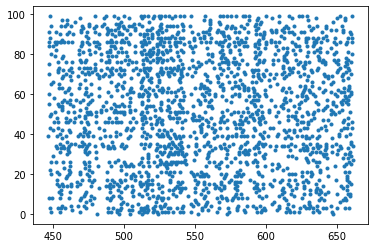

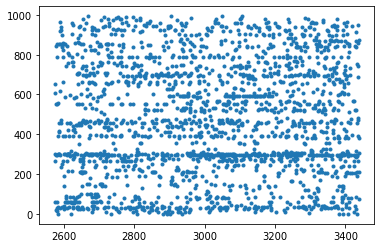

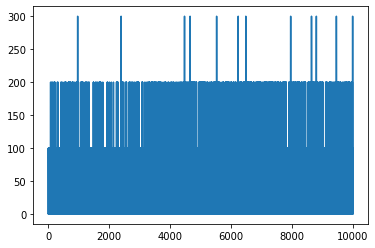

In [19]:
plot_rasters(Mgp,Minput,pop)

(array([1929.,  916.,  713.,  589.,  578.,  571.,  537.,  562.,  517.,
        3121.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

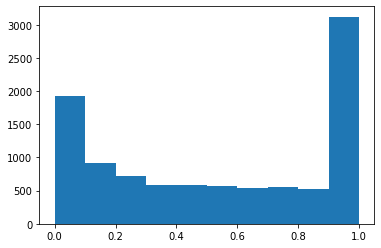

In [37]:
plt.hist(poisson)

(array([2065.,  774.,  736.,  689.,  700.,  686.,  639.,  621.,  663.,
        2337.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

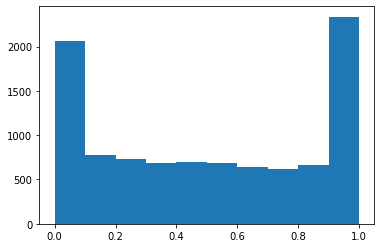

In [49]:
plt.hist(NP)

In [52]:
poisson=S.w

In [48]:
NP=S.w

In [59]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [61]:
p=NP/np.array(NP).sum()+1e-6
q=poisson/np.array(poisson).sum()+1e-6

In [62]:
kl_divergence(p,q)

0.8379427402393622

In [50]:
spikes=np.load('M_t.npy')*1000
cell_identity=np.load('M_i.npy')

-1.05
Running time of simulation:  113.92135667800903


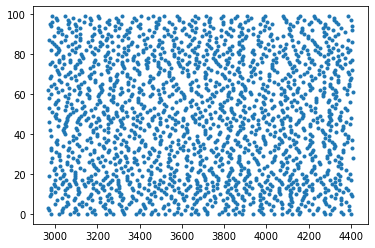

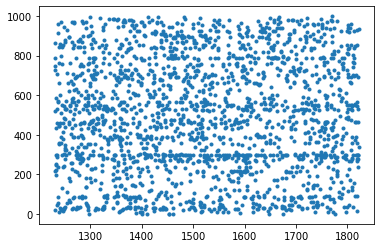

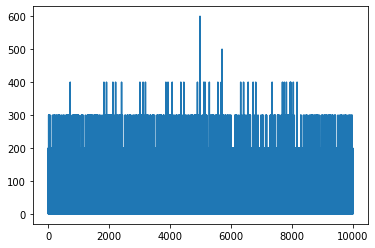

In [51]:
def plot_rasters(Mgp,Minput,pop):
    '''
    Plot 2000 time points from the middle of the simulation.
    '''
    plot(Mgp.t[4000:6000]/ms, Mgp.i[4000:6000], '.')
    plt.show()
    plot(Minput.t[4000:6000]/ms,Minput.i[4000:6000],'.')
    plt.show()
    plot(pop.t/ms, pop.rate/Hz)
    plt.show()

seed(7)
start=time.time()
#Clocks
simulation_clock=Clock(dt = 0.01*ms)
defaultclock.dt = 0.01*ms
#Parameters
t_ampa=2*ms
Cm= 0.5*nF
E_ampa=0.0*mV
g_ext_ampa=3.1*nS
vr = -70*mV
vt = -60*mV
taupre = 20*ms
taupost = taupre
gmax = 1.0
dApre = 1.0
dApost = -dApre * taupre / taupost * 1.05
print(dApost)
dApost *= gmax
dApre *= gmax
#Equations
eqs ='''
dv/dt = I_ampa/Cm : volt
I_ampa=-g_ext_ampa*s_ext*(v-E_ampa) : amp
ds_ext/dt=-s_ext/t_ampa : 1
'''
#NeuronGroups
neuron = NeuronGroup(100, eqs, threshold='v>vt', reset='v=vr')
neuron.v = E_ampa
neuron.s_ext = 0
spikes_gen=SpikeGeneratorGroup(1000,list(cell_identity),spikes*ms)
#Synapses
w = 1
S = Synapses(spikes_gen, neuron, '''w : 1
                dApre/dt = -Apre / taupre : 1 (event-driven)
                dApost/dt = -Apost / taupost : 1 (event-driven)''',
                on_pre='''s_ext += w
                Apre += dApre
                w = clip(w + Apost, 0, gmax)''',
                on_post='''Apost += dApost
                w = clip(w + Apre, 0, gmax)''')
S.connect(p=0.1)
S.w = 'rand() * gmax'
# Record the spikes
Mgp = SpikeMonitor(neuron)
Minput = SpikeMonitor(spikes_gen)
pop=PopulationRateMonitor(spikes_gen)
I_ampa_lst=[]
#@network_operation(simulation_clock,when='start')
#def get_summed_intermembrane_currents(simulation_clock):
    #I_ampa=np.sum(neuron.I_ampa[:])
    #I_ampa_lst.append(I_ampa)
duration=10000*ms
run(duration)
end=time.time()
print('Running time of simulation: ', end-start)
plot_rasters(Mgp,Minput,pop)
#np.save('Mgpt_AMPA_feedforward_NP.npy',Mgp.t)
#np.save('Mgpi_AMPA_feedforward_NP.npy',Mgp.i)
#np.save('I_lst_AMPA_feedforward_NP.npy',I_ampa_lst)
